In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

## Importing dataset

1. Since data is in form of excel file we have to use pandas read_excel to load the data
2. After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row
3. Check whether any null values are there or not. if it is present then following can be done,
    - Imputing data using Imputation method in sklearn
    - Filling NaN values with mean, median and mode using fillna() method
4. Describe data --> which can give statistical analysis

In [2]:
# Load the data
train_data = pd.read_excel('Data_Train.xlsx')

# max_columns sets the maximum number of rows and columns displayed when a frame is pretty-printed.
pd.set_option('display.max_columns', None)

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# Using below method we can check how many features are categorical/continuous and which columns has missing values

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
# Using below method we can see that how many missing values are present in the dataset

train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
# So as only 1 value is missing so we can drop it off

train_data.dropna(inplace=True)

In [7]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
# As the missing values are now dropped off so we have a dataset with no NA values

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


# EDA


From description we can see that Date_of_Journey is a object data type,\ Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.

**.dt.day method will extract only day of that date**\ **.dt.month method will extract only month of that date**

In [9]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
import datetime as dt

train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.day
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.month

# We can also fetch weekofday from this method

In [11]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [12]:
# Now we will drop off column 'Date_of_Journey' from the training dataset

train_data.drop(labels=['Date_of_Journey'], axis=1, inplace=True)

In [13]:
# Departure time is when a plane is leaving the gate
# Now similar to 'Date_of_Journey' we will use pd.to_datetime to extract hour and minute

# Extracting hours
train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour

# Extracting minutes
train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute

# Dropping the column 'Dep_time'
train_data.drop(labels=['Dep_Time'], axis=1, inplace=True)

In [14]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [15]:
# Arrival time is when a plane is arriving at the gate
# Now similar to 'Dep_Time' we will use pd.to_datetime to extract hour and minute from 'Arrival_Time'

# Extracting hours
train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour

# Extracting minutes
train_data['Arrival_min'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute

# Dropping the column 'Arrival_time'
train_data.drop(labels=['Arrival_Time'], axis=1, inplace=True)

In [16]:
train_data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


### Fetching the hours and minutes from 'Duration

In [17]:
# Here we are appending the "0h" where only minutes are mentioned in 'Duration'
# To find out the index we will use 'df.loc.index' and 'df.iloc'

for duration in train_data['Duration']:
    if 'h' not in duration:
        j = train_data.loc[train_data['Duration']==duration].index[0]
        train_data['Duration'].iloc[j] = "0h " + duration

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
# Now once we have proper dataset in __h __m then in this case we will extract the Duration in hours and minutes
import re

duration_hours = []
duration_min = []

for duration in train_data['Duration']:
    duration = re.sub('[^0-9]', ' ', duration)
    dur = duration.split()
    # Add hours and minutes
    if len(dur) > 1:
        duration_hours.append(int(dur[0]))
        duration_min.append(int(dur[1]))
    # Add minutes as 0 where we have only hours
    else:
        duration_hours.append(int(dur[0]))
        duration_min.append(0)

In [19]:
# Adding columns 'Duration_hrs' and 'Duration_min' in dataset train_data
train_data['Duration_hrs'] = duration_hours
train_data['Duration_min'] = duration_min

# Dropping off column 'Duration' from the dataset train_data
train_data.drop(labels=['Duration'], axis=1, inplace=True)

In [20]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hrs,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Handling Categorical data

One can find many ways to handle categorical data. Some of them categorical data are,

**Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case

**Ordinal data** --> data are in order --> **LabelEncoder** is used in this case

In [21]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

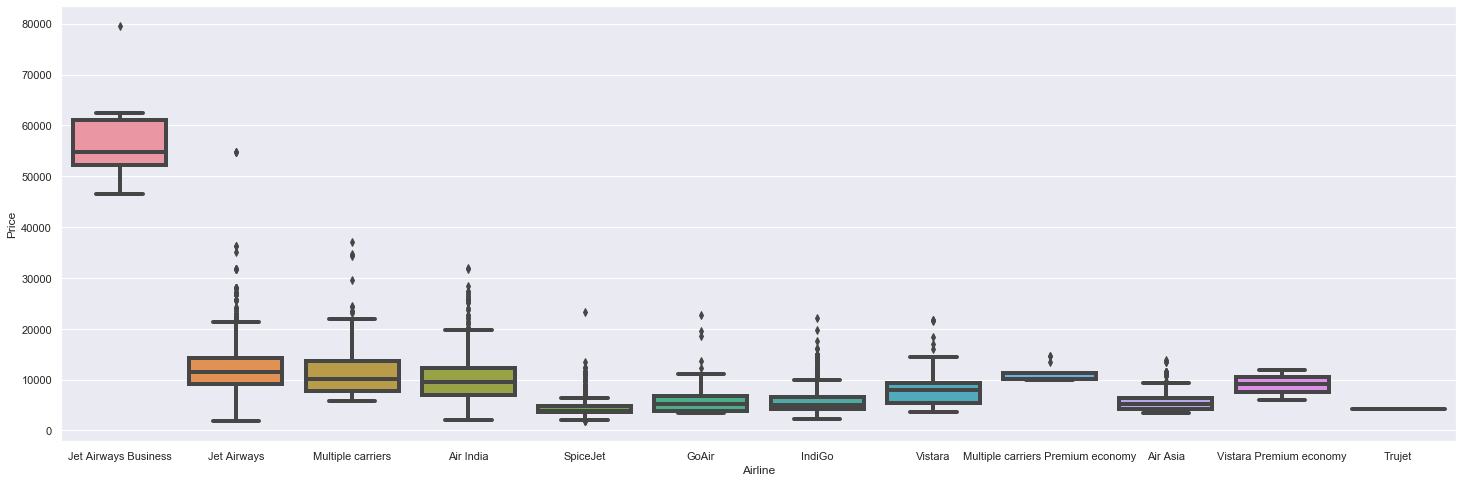

In [22]:
# We are creating a boxplot in this case and we can see that the median of almost all other air service are same except 
# 'Jet Airways Business'

plt.figure(figsize=(25, 8))
sns.boxplot(data=train_data.sort_values(by='Price', ascending=False), x='Airline', y='Price', linewidth=4)
plt.show()

In [23]:
# Also Airline a nominal category and so we will perform One-hot encoding in this case

Airline = train_data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [24]:
# Similarly we also look at unique count for 'Source'

train_data.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

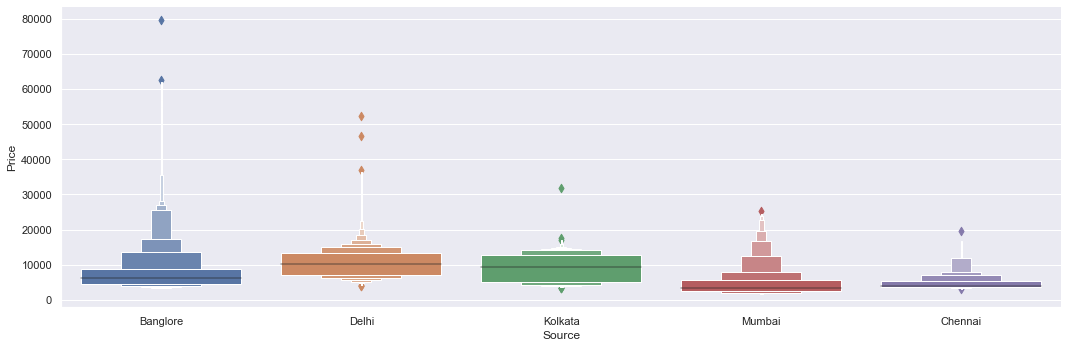

In [25]:
# We are creating a catplot which almost works similar to boxplot and are creating for 'Source' vs 'Price'

sns.catplot(data=train_data.sort_values(by='Price', ascending=False), x='Source', y='Price', kind='boxen', aspect=3)
plt.show()

In [26]:
# Also Source is a nominal category and so we will perform One-hot encoding in this case

Source = train_data[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [27]:
# Similarly we also look at unique count for 'Destination'

train_data.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

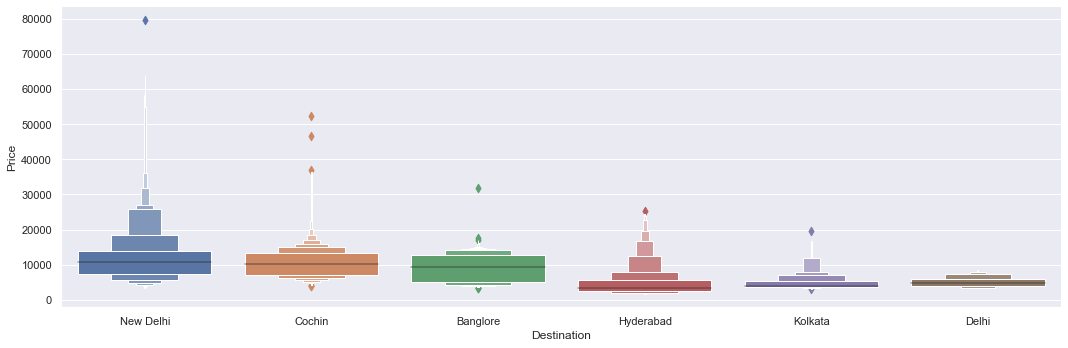

In [28]:
# We are creating a catplot which almost works similar to boxplot and are creating for 'Destination' vs 'Price'

sns.catplot(data=train_data.sort_values(by='Price', ascending=False), x='Destination', y='Price', kind='boxen', aspect=3)
plt.show()

In [29]:
# Also Destination is a nominal category and so we will perform One-hot encoding in this case

Destination = train_data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [30]:
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [31]:
# We can see here that 'Additional_Info' contains almost 80% 'No_info' and 'Route' and 'Total_Stops' are related to each other
# and so we can drop both of them

train_data.drop(labels=['Additional_Info', 'Route'], axis=1, inplace=True)

In [32]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [33]:
# Now as the case of 'Total_Stops' comes under Ordinal Data so we can perform LabelEncoding in this case

encode = {
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4,
}

train_data['Total_Stops'] = train_data['Total_Stops'].apply(lambda x: encode[x])

# We can also use:
# train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [34]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hrs,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [35]:
# Now we will be concating the train_data, Airline, Source, Destination into a single Dataframe and then
# we can remove the columns - 'Airline', 'Source', 'Destination' from that Dataframe

data_train = pd.concat([train_data, Airline, Source, Destination], axis=1)

data_train.drop(labels=['Airline', 'Source', 'Destination'], axis=1, inplace=True)

data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hrs,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [36]:
data_train.shape

(10682, 30)

# Test set

In [37]:
test_data = pd.read_excel('Test_set.xlsx')

In [38]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


### Pre-processing of test dataset

In [39]:
# Preprocessing

print('Test data Info')
print("-"*75)
print(test_data.info())

print()
print()

print('Null Values :')
print("-"*75)
test_data.dropna(inplace=True)
print(test_data.isna().sum())

# EDA

# Date Of Journey
test_data['Journey_day'] = pd.to_datetime(test_data['Date_of_Journey'], format='%d/%m/%Y').dt.day
test_data['Journey_month'] = pd.to_datetime(test_data['Date_of_Journey'], format='%d/%m/%Y').dt.month
test_data.drop(labels=['Date_of_Journey'], axis=1, inplace=True)


# Dep Time
test_data['Dep_hour'] = pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_min'] = pd.to_datetime(test_data['Dep_Time']).dt.minute
test_data.drop(labels=['Dep_Time'], axis=1, inplace=True)

# Arrival Time
test_data['Arrival_hour'] = pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_min'] = pd.to_datetime(test_data['Arrival_Time']).dt.minute
test_data.drop(labels=['Arrival_Time'], axis=1, inplace=True)

# Duration
for duration in test_data['Duration']:
    if 'h' not in duration:
        j = test_data.loc[test_data['Duration']==duration].index[0]
        test_data['Duration'].iloc[j] = "0h " + duration

duration_hours = []
duration_min = []

for duration in test_data['Duration']:
    duration = re.sub('[^0-9]', ' ', duration)
    dur = duration.split()
    # Add hours and minutes
    if len(dur) > 1:
        duration_hours.append(int(dur[0]))
        duration_min.append(int(dur[1]))
    # Add minutes as 0 where we have only hours
    else:
        duration_hours.append(int(dur[0]))
        duration_min.append(0)
    
test_data['Duration_hrs'] = duration_hours
test_data['Duration_min'] = duration_min
test_data.drop(labels=['Duration'], axis=1, inplace=True)

# Categorical Data

print('Airline')
print("-"*75)
print(test_data['Airline'].value_counts())
Airline = test_data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)

print()

print('Source')
print("-"*75)
print(test_data['Source'].value_counts())
Source = test_data[['Source']]
Source = pd.get_dummies(Source, drop_first=True)

print()

print('Destination')
print("-"*75)
print(test_data['Destination'].value_counts())
Destination = test_data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)

print()

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(labels=['Additional_Info', 'Route'], axis=1, inplace=True)

# Total Stops
encode = {
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4,
}
test_data['Total_Stops'] = test_data['Total_Stops'].apply(lambda x: encode[x])


# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis=1)
data_test.drop(labels=['Airline', 'Source', 'Destination'], axis=1, inplace=True)

print()
print()

print('Shape of test data: ', data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null Values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [40]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hrs,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Feature selection

Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

1. heatmap

2. feature_importance_

3. SelectKBest

In [41]:
data_train.shape

(10682, 30)

In [42]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hrs',
       'Duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

- Selecting a single column (df['A'] is the same as df.loc[:, 'A'] -> selects column A)
- Selecting a list of columns (df[['A', 'B', 'C']] is the same as df.loc[:, ['A', 'B', 'C']] -> selects columns A, B and C)
- Slicing by rows (df[1:3] is the same as df.iloc[1:3] -> selects rows 1 and 2.

In [43]:
# Setting up the training data

X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hrs',
       'Duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hrs,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [44]:
# Setting up the target data

y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

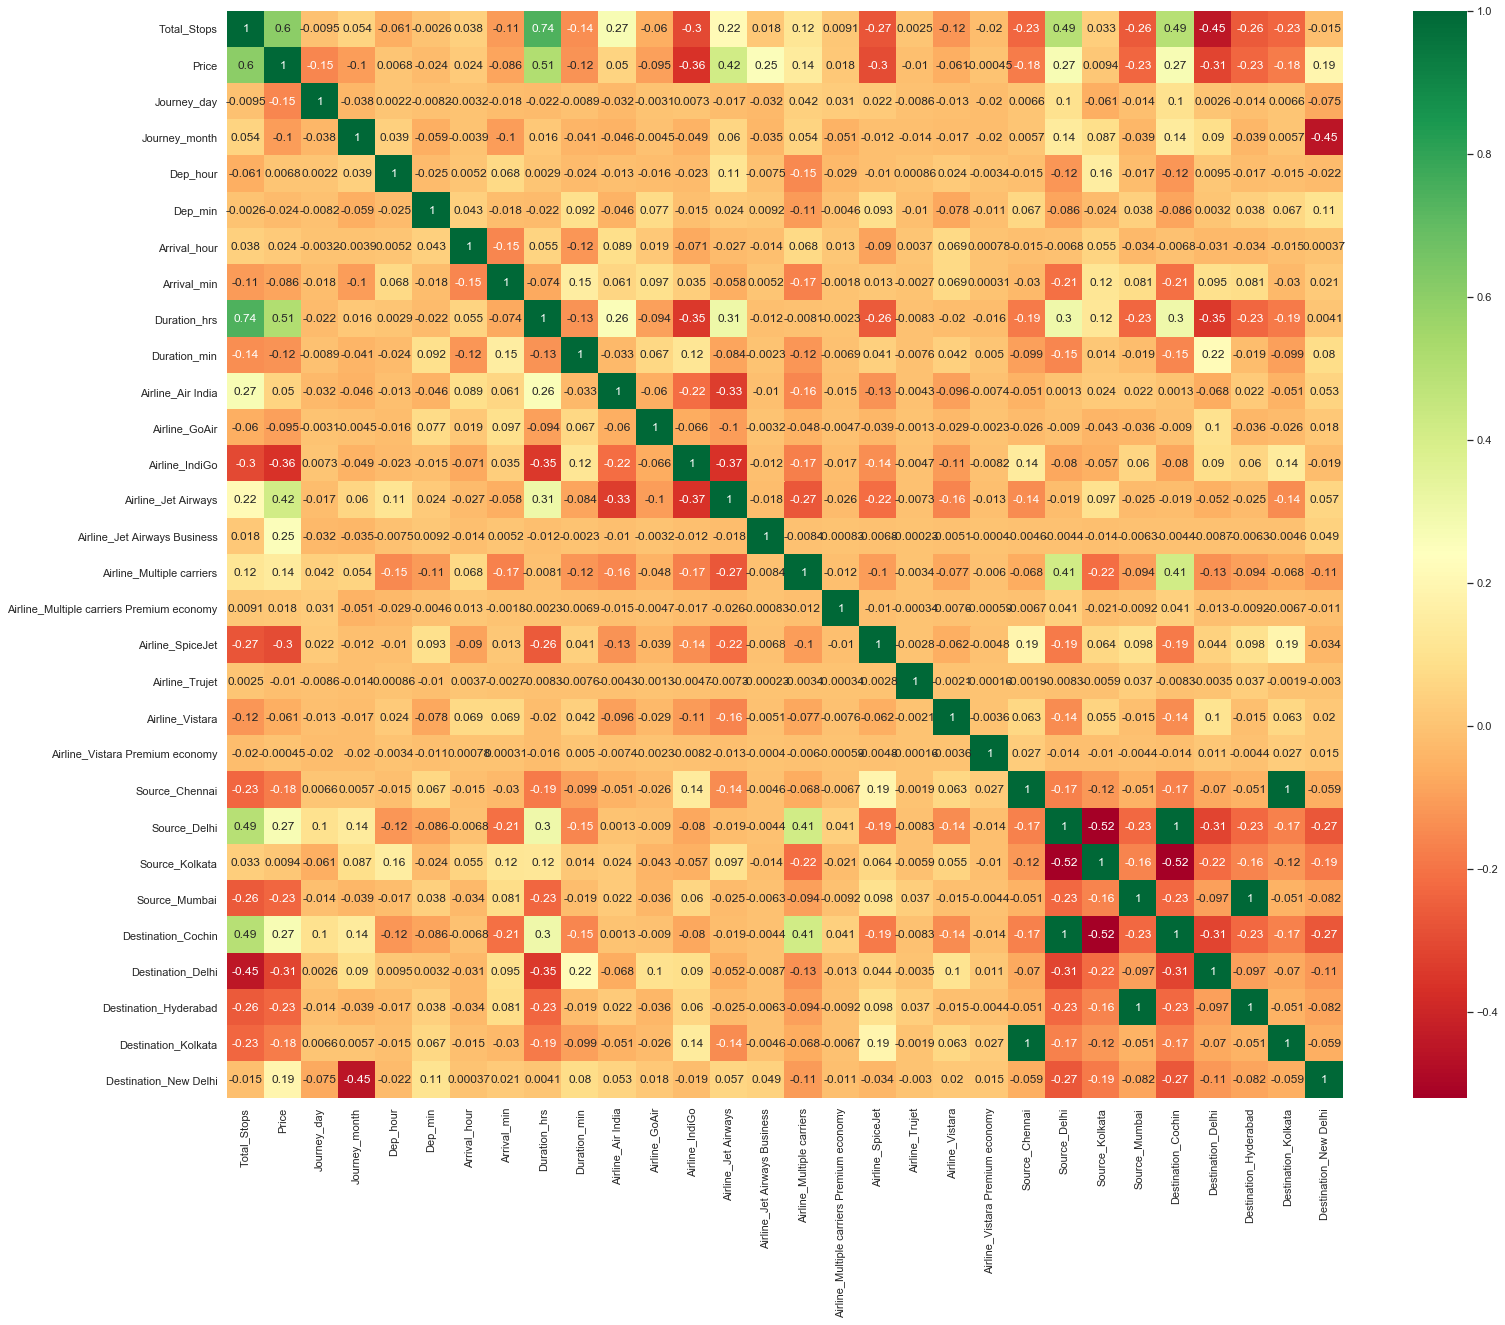

In [45]:
# Find corelation between Independent and Dependent variable
    
plt.figure(figsize=(25, 20))
sns.heatmap(data_train.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [46]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [47]:
feat = pd.DataFrame(selection.feature_importances_, columns=['feat_imp'])
feat['col_name'] = X.columns
feat = feat.sort_values(by='feat_imp', ascending=False)

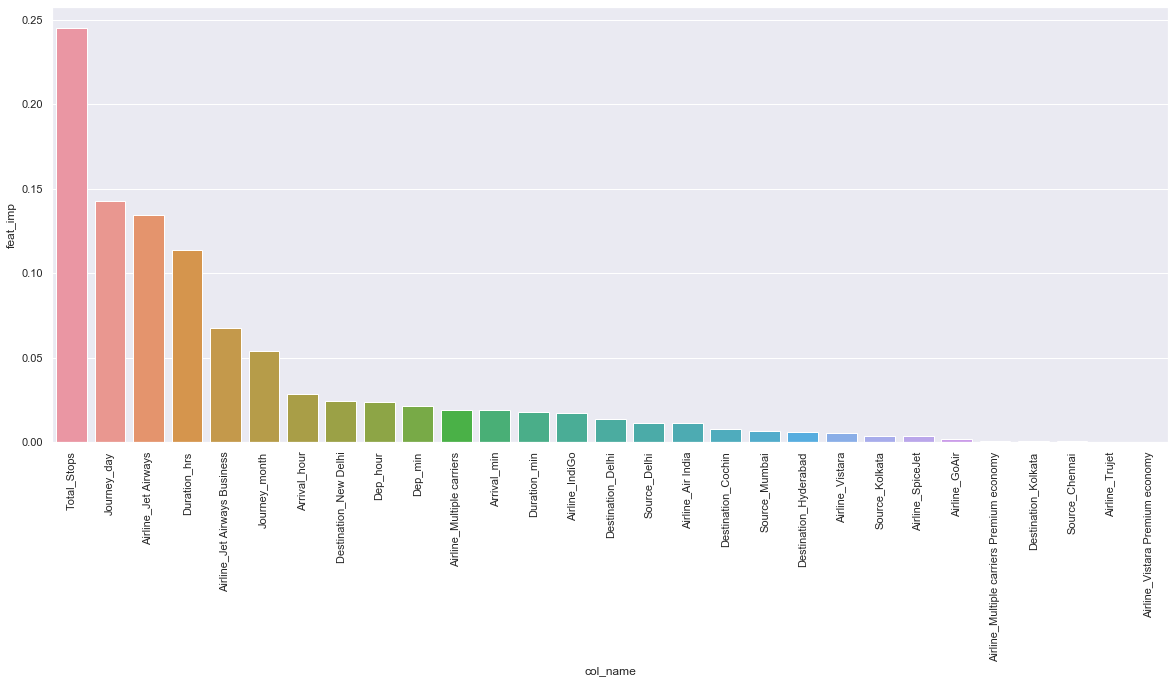

In [48]:
plt.figure(figsize=(20, 8))
sns.barplot(data=feat, x='col_name', y='feat_imp')
plt.xticks(rotation=90)
plt.show()

## Fitting model using Random Forest

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
3. Scaling is not done in Random forest
4. Import model
5. Fit the data
6. Predict w.r.t X_test
7. In regression check RSME Score
8. Plot graph

In [49]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)

RandomForestRegressor()

In [51]:
ypred = rf.predict(xtest)

In [52]:
rf.score(xtrain, ytrain)

0.9534364432396455

In [53]:
rf.score(xtest, ytest)

0.7955213694318763

### Checking the distribution of the difference between ytest-ypred using seaborn

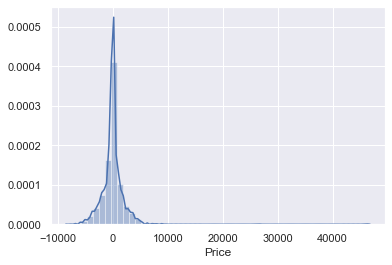

In [54]:
sns.distplot(ytest-ypred)

# Based on below distribution we can see that the our model is good as it is forming a Gaussian Distribution

### Checking the spread of the data of ytest and ypred using scatterplot

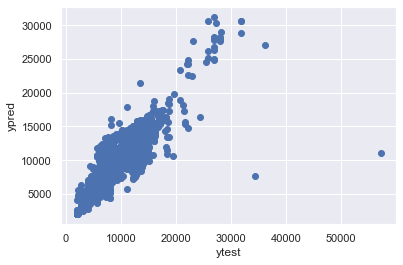

In [55]:
plt.scatter(ytest, ypred)
plt.xlabel('ytest')
plt.ylabel('ypred')
plt.show()

# By checking the scatterplot we can see that it is in increasing order 

In [56]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print('r2 score is: ', r2_score(ytest, ypred))
print('mean_absolute_error is: ', mean_absolute_error(ytest, ypred))
print('mean_squared_error is: ', mean_squared_error(ytest, ypred))
print('RMSE is: ', np.sqrt(mean_squared_error(ytest, ypred)))

r2 score is:  0.7955213694318763
mean_absolute_error is:  1180.2257328644425
mean_squared_error is:  4408979.749397353
RMSE is:  2099.7570691385595


## Hyper parameter Tuning

- Choose following method for hyperparameter tuning
  1. RandomizedSearchCV --> Fast
  2. GridSearchCV
- Assign hyperparameters in form of dictionery
- Fit the model
- Check best paramters and best score

In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
# RandomizedSearchCV

# Number of trees in RandomForest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=12)]

# Number of features consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=6)]

# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(start=5, stop=100, num=20)]

# Minimum number of samples required at each leaf node 
min_samples_leaf = [4, 5, 7, 9]

In [59]:
# Create the random grid

random_grid = {
    'n_estimators'     : n_estimators,
    'max_features'     : max_features,
    'max_depth'        : max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf'   : min_samples_leaf
}

Random search of parameters using 5 folds cross validation.
Search across 10 different combinations.

Each iteration represents a new model trained on a new draw from your dictionary of hyperparameter distributions. The number of cross validation folds you choose determines how many times it will train each model on a different subset of data in order to assess model quality. The total number of models random search trains is then equal to n_iter * cv.

In [60]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=10, cv=5, n_jobs=-1, random_state=42, verbose=2)

In [61]:
rf_random.fit(xtrain, ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [4, 5, 7, 9],
                                        'min_samples_split': [5, 10, 15, 20, 25,
                                                              30, 35, 40, 45,
                                                              50, 55, 60, 65,
                                                              70, 75, 80, 85,
                                                              90, 95, 100],
                                        'n_estimators': [100, 181, 263, 345,
                                                         427, 509, 590, 672,
                                                         754, 836, 918, 1000]},
                   random_state=42, verbose=2)

In [62]:
# Check the best parameters

rf_random.best_params_

{'n_estimators': 181,
 'min_samples_split': 15,
 'min_samples_leaf': 7,
 'max_features': 'auto',
 'max_depth': 20}

In [63]:
prediction = rf_random.predict(xtest)

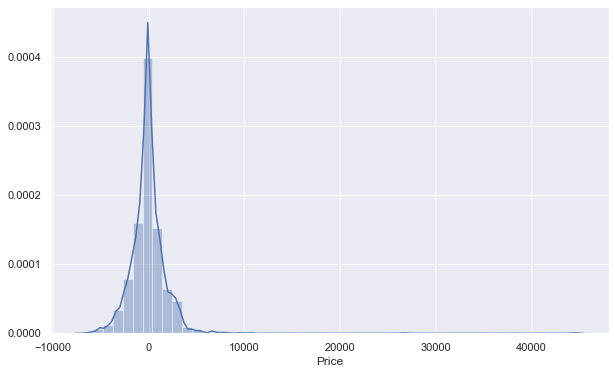

In [64]:
# Check the distribution of difference of ytest and prediction

plt.figure(figsize=(10, 6))
sns.distplot(ytest-prediction)
plt.show()

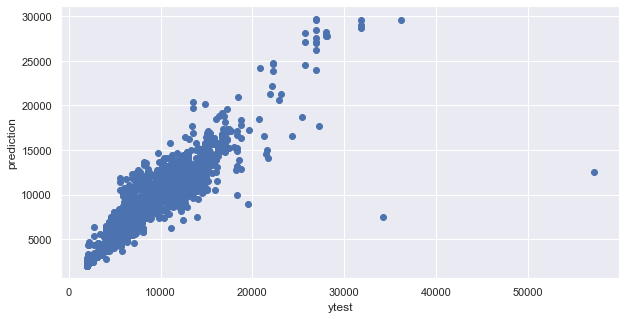

In [65]:
# Check the distribution of ytest and prediction in scatterplot

plt.figure(figsize=(10, 5))
plt.scatter(ytest, prediction)
plt.xlabel('ytest')
plt.ylabel('prediction')
plt.show()

In [66]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print('r2 score is: ', r2_score(ytest, prediction))
print('mean_absolute_error is: ', mean_absolute_error(ytest, prediction))
print('mean_squared_error is: ', mean_squared_error(ytest, prediction))
print('RMSE is: ', np.sqrt(mean_squared_error(ytest, prediction)))

r2 score is:  0.8129496757405155
mean_absolute_error is:  1185.3624927818255
mean_squared_error is:  4033189.627135731
RMSE is:  2008.280266082334


## Save the model and reuse it

In [67]:
import pickle

# open the file where we want to store the information
file = open('flight_rf.pkl', 'wb')

# dump the information to that file
pickle.dump(rf_random, file)

In [68]:
model = open('flight_rf.pkl', 'rb')
forest = pickle.load(model)

In [69]:
y_prediction = forest.predict(xtest)

In [70]:
r2_score(ytest, y_prediction)

0.8129496757405155

## Run the model on the test dataset

In [71]:
data_train.shape

(10682, 30)

In [72]:
data_test.shape

(2671, 28)

In [73]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hrs',
       'Duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [74]:
data_test.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hrs', 'Duration_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [75]:
data_test['Airline_Trujet'] = 0
data_test.shape

(2671, 29)

In [76]:
y_test_pred = forest.predict(data_test)
y_test_pred

array([13420.23688087,  4752.48385053, 15295.47196825, ...,
       16492.18821413, 12919.97261723,  8370.90322219])

In [78]:
data_test['Price'] = y_test_pred
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hrs,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline_Trujet,Price
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,13420.236881
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4752.483851
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,15295.471968
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,11094.382103
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4157.578146
